<a href="https://colab.research.google.com/github/mading225/GROUP-6-PROJECT-/blob/main/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

## Business Problem

The company is planning to enter the entertainment industry by launching a new movie studio. While the company has experience in other business areas, it currently lacks expertise in movie production and distribution.

Creating movies requires significant upfront investment, and poor decisions around genre, audience targeting, or production strategy can lead to major financial losses. To reduce this risk, the company needs data-driven guidance on what types of films are most likely to succeed in today’s market.

## Business Objectives

The objective of this project is to **analyze historical movie data** to identify patterns associated with **financial success and positive audience reception.**

Using box office performance and audience ratings, this analysis aims to answer the following questions:

 - What types of movies generate the highest box office revenue?

 - Which movie characteristics are associated with strong audience approval?

 - What trends can guide the studio’s initial movie production strategy?

## Key Business Questions

To support leadership decision-making, this project focuses on three core questions:

 - **Which movie genres consistently perform best at the box office?**

 - **How does audience reception (ratings and engagement) relate to financial success?**

 - **What movie characteristics (such as runtime or release trends) are most associated with successful films?**

# Data Understanding

To explore what types of movies perform best both financially and critically, this project uses three datasets sourced from widely recognized movie industry platforms. Each dataset provides a different perspective on movie performance, allowing for a more well-rounded analysis.

In [1]:
# Importing the necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## IMDB Dataset

The IMDB data is stored in a SQLite database. This database contains multiple tables, but this analysis focuses on:

`movie_basics`

`movie_ratings`

These tables provide movie characteristics and audience ratings.

In [2]:
# Unzipping the zipped imdb dataset
!unzip im.db.zip -d zippedData


Archive:  im.db.zip
  inflating: zippedData/im.db        


In [3]:
# Connect to Sqlite3
conn = sqlite3.connect('zippedData/im.db')

# Load relevant tables
movie_basics = pd.read_sql("""
SELECT * FROM movie_basics;
""", conn)

movie_ratings = pd.read_sql("""
SELECT * FROM movie_ratings;
""", conn)



In [4]:
# Previewing the movie_basics table
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# Previewing the movie_ratings table
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Box Office Mojo Dataset (*bom.movie_gross.csv.gz*)


This dataset contains box office revenue data for movies released domestically and internationally.

In [6]:
# Loading and Previewing the gross dataset
gross = pd.read_csv('bom.movie_gross.csv.gz')
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The Box Office Mojo dataset was provided as a gzip-compressed CSV file, which was read directly using pandas without the need for manual extraction.

## The Movie Database (*tmdb.movies.csv.gz*)

The TMDB dataset provides detailed information about movies, including popularity metrics and audience ratings, which complement the IMDB and Box Office Mojo datasets.

In [7]:
# Loading and previewing the tmdb dataset
movies = pd.read_csv('tmdb.movies.csv.gz')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Data Preparation

Since we have loaded in the datasets and previewed them, we are going to prepare them for modelling and visualisations.

We will prepare our datasets by; cleaning, removing duplicates and finally merging all our three datasets into one.

## Data Cleaning

Here we are going to remove any null values and duplicates if need be. As well as also dropping columns and merging if needed.

### IMDB Datasets

The IMDB holds two datasets, `movie_basics` and `movie_ratings`. These two datasets will have to be cleaned individually then once we are done with cleaning, we will merge both the datasets into one.


#### Movie_basics Dataset

In [8]:
# Checking for any null values
movie_basics.isnull().sum()

,0
movie_id,0
primary_title,0
original_title,21
start_year,0
runtime_minutes,31739
genres,5408


In [9]:
# Removing null values in the primary title column
movie_basics.dropna(subset=['primary_title'], inplace=True)
movie_basics['primary_title'].isnull().sum()

np.int64(0)

In [10]:
# Removing null values from the runtime column
movie_basics.dropna(subset=['runtime_minutes'], inplace=True)
movie_basics['runtime_minutes'].isnull().sum()

np.int64(0)

In [11]:
# Removing null values from the genre column
movie_basics.dropna(subset=['genres'], inplace=True)
movie_basics['genres'].isnull().sum()

np.int64(0)

In [12]:
# Dropping the original title column
movie_basics = movie_basics.drop(columns=['original_title'])
movie_basics

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
146134,tt9916160,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


In [13]:
movie_basics.duplicated().sum()

np.int64(0)

We have managed to remove all null values from the `movie_basics` dataset.

We also dropped the *original_title* column because it holds no value to us since it has the original names of certain movie titles which will only hold the dataset back during merging.

The dataset held no duplicates.

#### Movie_ratings Dataset

In [14]:
movie_ratings.isnull().sum()

,0
movie_id,0
averagerating,0
numvotes,0


Since the `movie_ratings` dataset holds no null values, we proceed over to merging.

#### Merging `movie_basics` and `movie_ratings`

In [15]:
# Step 1: Merge on movie_id
merged_imdb = pd.merge(
    movie_basics,
    movie_ratings,
    left_on= 'movie_id', # movie_basics
    right_on= 'movie_id', # movie_ratings
    how='inner'
)

# Step 3: Arranging the columns
merged_imdb = merged_imdb[[
    'movie_id',
    'primary_title',
    'start_year',
    'runtime_minutes',
    'genres',
    'averagerating'
]]


print("Merged shape:", merged_imdb.shape)
merged_imdb.head()

Merged shape: (65720, 6)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1


We have merged the two datasets by using the common column being *movie_id* which resulted in rows with matching *movie_id* to be chosen and resulted in the `merged_imdb` dataset

### Box Office Mojo Dataset

In [16]:
gross.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [17]:
# Dropping the null values in the studio column
gross.dropna(subset=['studio'], inplace=True)
gross['studio'].isnull().sum()

np.int64(0)

In [18]:
# Dropping the null values in the domestic gross column
gross.dropna(subset=['domestic_gross'], inplace=True)
gross['domestic_gross'].isnull().sum()

np.int64(0)

In [19]:
# Dropping the null values in the foreign gross column
gross.dropna(subset=['foreign_gross'], inplace=True)
gross['foreign_gross'].isnull().sum()

np.int64(0)

In [20]:
# Combining domestic and foreign gross column into total_gross

# Step 1: Removing commas from the foreign_gross column
gross['foreign_gross'] = (gross['foreign_gross'] .str.replace(',', '', regex=False))

# Step 2: Convert to float first to handle decimals
gross['domestic_gross'] = pd.to_numeric(gross['domestic_gross'])
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'])

# Step 3: Convert to integer
gross['domestic_gross'] = gross['domestic_gross'].astype(int)
gross['foreign_gross'] = gross['foreign_gross'].astype(int)

# Step 4: Create total_gross
gross['total_gross'] = gross['domestic_gross'] + gross['foreign_gross']

# Step 5: Removing domestic and foreign gross columns
gross = gross.drop(columns=['domestic_gross', 'foreign_gross'])
gross

,title,studio,year,total_gross
0,Toy Story 3,BV,2010,1067000000
1,Alice in Wonderland (2010),BV,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,960300000
3,Inception,WB,2010,828300000
4,Shrek Forever After,P/DW,2010,752600000
...,...,...,...,...
3275,I Still See You,LGF,2018,1501400
3286,The Catcher Was a Spy,IFC,2018,954000
3309,Time Freak,Grindstone,2018,266000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,2018,98400


We have managed to remove all null values from the `gross` dataset.

We merged and dropped the domestic and foreign gross columns to form a *total_gross* column.

### The Movie Database (*TMDB*)

In [21]:
movies.isnull().sum()

,0
Unnamed: 0,0
genre_ids,0
id,0
original_language,0
original_title,0
popularity,0
release_date,0
title,0
vote_average,0
vote_count,0


The *TMDB* dataset has no nulls.

## Merging the three datasets

Here we are going to be merging the IMDB, gross and TMDB datasets into one.

This will help with an easier access during visualisations by having only relevant columns in the dataset

### Merging IMDB and Gross

We will merge the two datasets by using the common columns being the title and year columns found in both datasets.



In [22]:
# Step 1: Normalize title and year columns
merged_imdb['primary_title'] = merged_imdb['primary_title'].str.lower().str.strip()
gross['title'] = gross['title'].str.lower().str.strip()

# Step 2: Merge on title and year
merge1 = pd.merge(
    gross,
    merged_imdb,
    left_on=['title', 'year'], # gross
    right_on=['primary_title', 'start_year'], # merged_imdb
    how='inner'
)

# Step 3: Select and rename desired columns
merge1 = merge1[[
    'movie_id',
    'title',
    'year',
    'studio',
    'genres',
    'runtime_minutes',
    'total_gross',
    'averagerating'
]]


print("Merged shape:", merge1.shape)
merge1.head()

Merged shape: (1301, 8)


,movie_id,title,year,studio,genres,runtime_minutes,total_gross,averagerating
0,tt0435761,toy story 3,2010,BV,"Adventure,Animation,Comedy",103.0,1067000000,8.3
1,tt1375666,inception,2010,WB,"Action,Adventure,Sci-Fi",148.0,828300000,8.8
2,tt0892791,shrek forever after,2010,P/DW,"Adventure,Animation,Comedy",93.0,752600000,6.3
3,tt1325004,the twilight saga: eclipse,2010,Sum.,"Adventure,Drama,Fantasy",124.0,698500000,5.0
4,tt1228705,iron man 2,2010,Par.,"Action,Adventure,Sci-Fi",124.0,623900000,7.0


The merge has been successful resulting in 1301 rows with the 8 columns we handpicked from both datasets. These rows are the ones that matched titles and years from both datasets meaning the gross, rating and studio columns are also matched up correctly.

## Merging with TMDB

The TMDB dataset has only one column that we can use during the merge and that is the title column. The result shape of the merge is intended to not have a big gap.

In [23]:
# Step 1: Normalize title column
movies['title'] = movies['title'].str.lower().str.strip()

# Step 2: Merge on title and year
merged = pd.merge(
    merge1,
    movies,
    left_on=['title'], # merge1
    right_on=['title'], # movies
    how='inner'
)

# Step 3: Select and rename desired columns
merged = merged[[
    'movie_id',
    'title',
    'year',
    'studio',
    'genres',
    'runtime_minutes',
    'total_gross',
    'averagerating',
    'popularity'
]]


print("Merged shape:", merged.shape)
merged.head()

Merged shape: (1424, 9)


,movie_id,title,year,studio,genres,runtime_minutes,total_gross,averagerating,popularity
0,tt0435761,toy story 3,2010,BV,"Adventure,Animation,Comedy",103.0,1067000000,8.3,24.445
1,tt1375666,inception,2010,WB,"Action,Adventure,Sci-Fi",148.0,828300000,8.8,27.920
2,tt0892791,shrek forever after,2010,P/DW,"Adventure,Animation,Comedy",93.0,752600000,6.3,15.041
3,tt1325004,the twilight saga: eclipse,2010,Sum.,"Adventure,Drama,Fantasy",124.0,698500000,5.0,20.340
4,tt1228705,iron man 2,2010,Par.,"Action,Adventure,Sci-Fi",124.0,623900000,7.0,28.515


The merge has been succesfull resulting in 1424 rows and 9 handpicked columns. As stated before the merge, the shape hasn't shown a huge spike rather just an addition of a few rows.

This dataset is what will be used during the visualisations on Tableau and as well on this notebook. Since it is cleaned, all values from visuals will not be flawed.

In [24]:
# Exporting the merged dataset for further visualisations for Tableau
merged.to_csv('merged_dataset.csv', index=False)

# Visualisations

Now that we have all the datasets merged, we can do the visualisations. These visuals are to help not only answer our business questions but also help build up recommendations that are backed-up by data.

The visuals will be grouped into two, which is **Financial Performance** and **Market Demand**

## Financial Performance

These visuals are to help us answer : *What should we do to maximize revenue?*

### Ratings Against Gross

This visual will help us know which rating guarantees success.

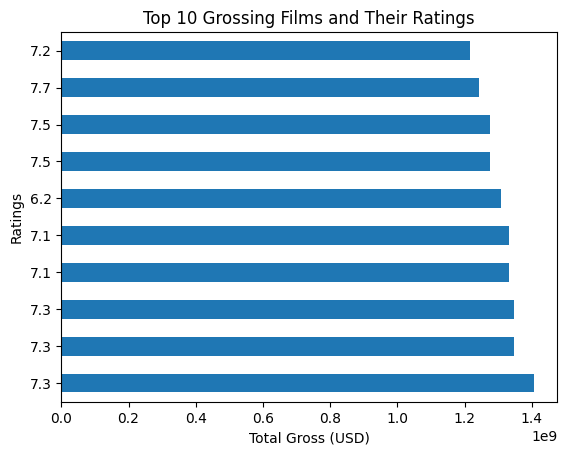

In [25]:
# Top 10 grossing films with their ratings
ratings_gross = merged[['total_gross','averagerating' ]].sort_values(by='total_gross', ascending=False).head(10)

# Plot horizontal bar chart
plt.figsize=(12, 6)
ratings_gross.plot(kind='barh', x='averagerating', y='total_gross', title='Top 10 Grossing Films and Their Ratings', legend=False)
plt.xlabel('Total Gross (USD)')
plt.ylabel('Ratings')
plt.show()

From the visual we can conclude that films that average a rating of 7 do very well in terms of gross.

### Genre against gross

This will help answer which genres have had the highest success in terms of gross.

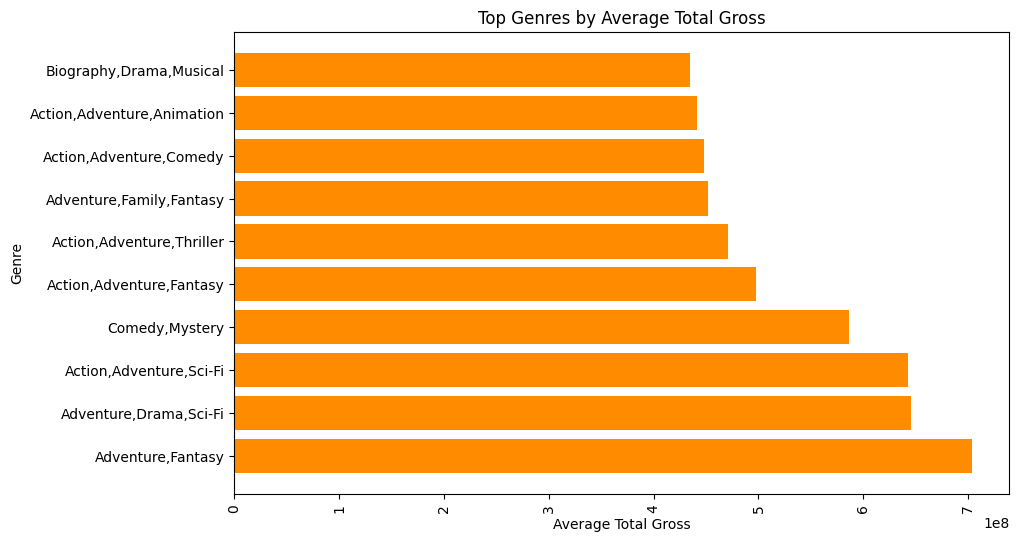

In [28]:
# Step 1: Split genres by "|" and explode into multiple rows
merged['genre_list'] = merged['genres'].str.split('|')
genre_exploded = merged.explode('genre_list')

# Step 2: Group by genre and calculate average gross
genre_group = genre_exploded.groupby('genre_list')['total_gross'].mean().sort_values(ascending=False).dropna()

# Step 3: Limit to top 10 genres
genre_group = genre_group.head(10)

# Step 4: Plot
plt.figure(figsize=(10,6))
plt.barh(genre_group.index, genre_group.values, color='darkorange')
plt.title("Top Genres by Average Total Gross")
plt.xlabel("Average Total Gross")
plt.ylabel("Genre")
plt.xticks(rotation=90)
plt.show()

From the chart, we can conclude that movies with genres centered around *Action* and *Adventure* generally attain a high gross.

### Runtime against Gross

This will help us know how long a movie should be to attain a high gross.

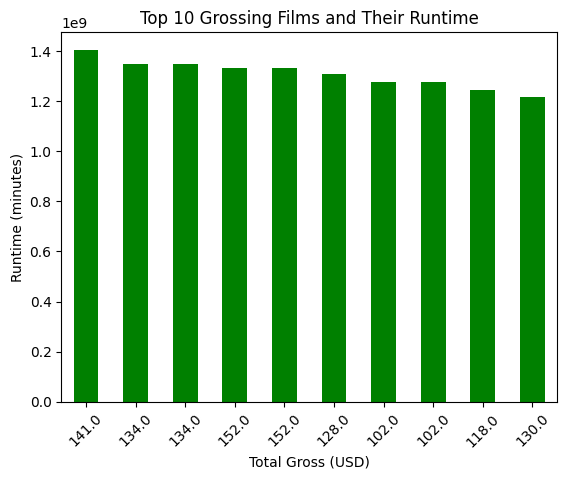

In [26]:
# Top 10 grossing films with their runtime
runtime_gross = merged[['runtime_minutes', 'total_gross']].sort_values(by='total_gross',ascending=False).head(10)

# Plot into a barchart
plt.figsize=(12, 6)
runtime_gross.plot(kind='bar', x='runtime_minutes', y='total_gross', title='Top 10 Grossing Films and Their Runtime',color='green',legend=False)
plt.xlabel('Total Gross (USD)')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)
plt.show()

From this chart we are able to see that movies between 100 - 150 minutes is the sweetspot for a good grossing movie.

### Studio against Gross

This visual will show us which studio has made the most gross from movies they have produced.

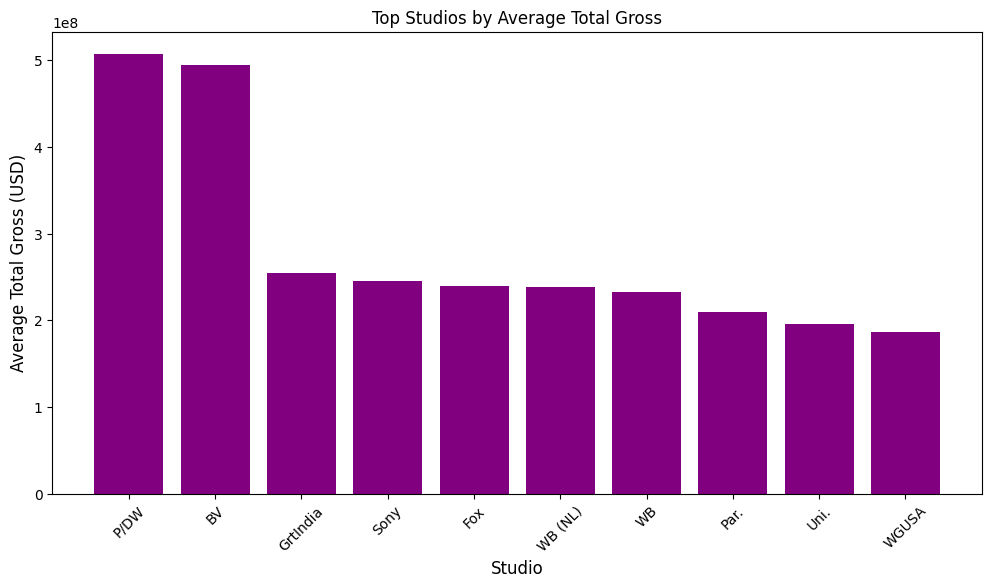

In [29]:
# Step 1: Group by studio and calculate average gross
studio_group = merged.groupby('studio')['total_gross'].mean().sort_values(ascending=False).dropna()

# Step 2: Limit to top 10 studios
studio_group = studio_group.head(10)

# Step 3: Plot
plt.figure(figsize=(12,6))
plt.bar(studio_group.index, studio_group.values, color='purple')
plt.title("Top Studios by Average Total Gross")
plt.xlabel("Studio",fontsize=12)
plt.ylabel("Average Total Gross (USD)",fontsize=12)
plt.xticks(rotation=45)
plt.show()

The charts shows that **DreamWorks Pictures**(*P/DW*)  , **BV Studios**(*BV* ) and **GrtIndia** consistently produce high grossing films.

### Popularity against gross

This will help answer what popularity average guarantees the best grossing film.

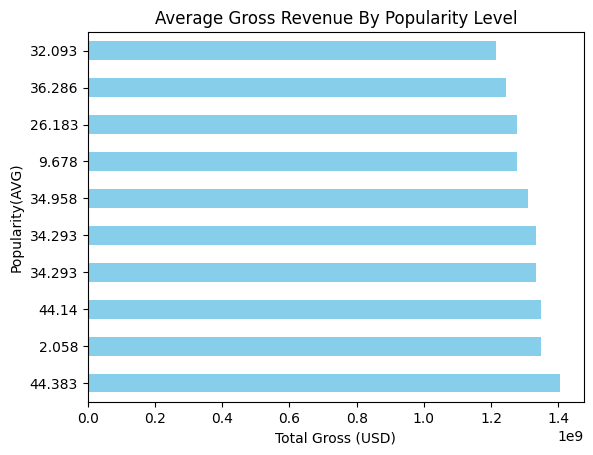

In [53]:
# Top
popularity_gross = merged[['total_gross','popularity' ]].sort_values(by='total_gross', ascending=False).head(10)

# Plot horizontal bar chart
plt.figsize=(12, 6)
popularity_gross.plot(kind='barh', x='popularity', y='total_gross',color = 'skyblue', legend=False)
plt.title('Average Gross Revenue By Popularity Level')
plt.xlabel('Total Gross (USD)')
plt.ylabel('Popularity(AVG)')
plt.show()

This chart highlights that movies that get a popularity of 30 and higher attain a high grossing.

## Market Demand

These visuals will help answer : *What attracts viewers and builds engagement?*

### Studio against ratings

This will help us know which studio has the highest ratings off of movies they produced.

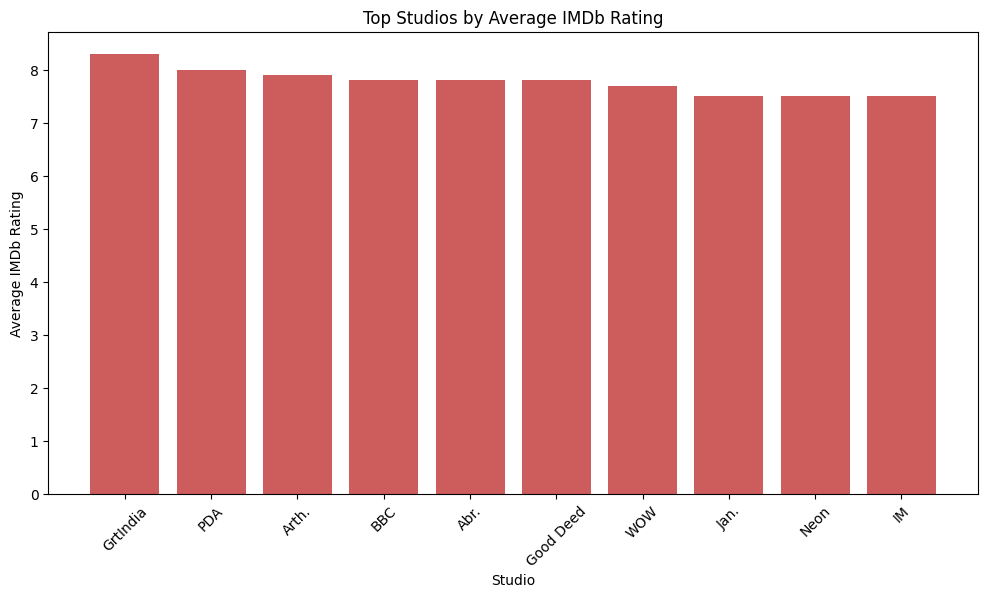

In [31]:
# Step 1: Group by studio and calculate averagerating
studio_rating = merged.groupby('studio')['averagerating'].mean().sort_values(ascending=False).dropna()

# Step 2: Limit to top 10 studios
studio_rating = studio_rating.head(10)

# Step 3: Plot
plt.figure(figsize=(12,6))
plt.bar(studio_rating.index, studio_rating.values, color='indianred')
plt.title("Top Studios by Average IMDb Rating")
plt.xlabel("Studio")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45)
plt.show()

From this chart, we see **GrtIndia**, **DreamWorks Pictures**(*P/DW*) and **Arth Studios** have the best ratings from movies they have produced.

### Genre against Popularity

This visual will help us know which genre attract the most audience attention.

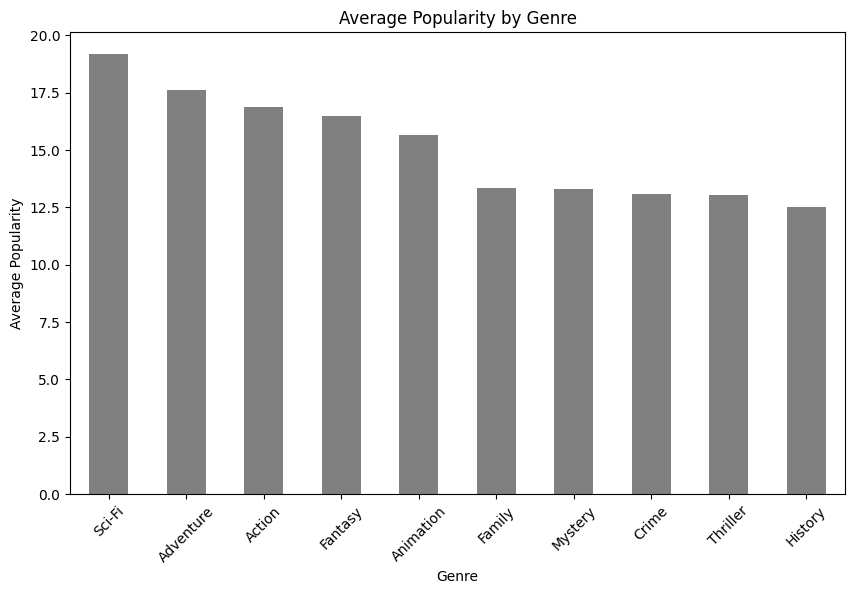

In [56]:
# split genres since they are comma separated
genre_df = merged.copy()
genre_df['genres'] = genre_df['genres'].str.split(',')

#take the column that contains lists and splits each list into separate rows.
genre_df = genre_df.explode('genres')

# Grouping with popularity, averaging them both and taking the top 10
genre_pop = genre_df.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10,6))
genre_pop.plot(kind='bar', color='grey')

plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

plt.show()

From the chart, we see that *Sci-fi* , *Adventure* and *Action* movies tend to gain the most attention from the audience.

### Studio against Popularity

This will help us know which studio attracts the most viewers from movies they have produced.

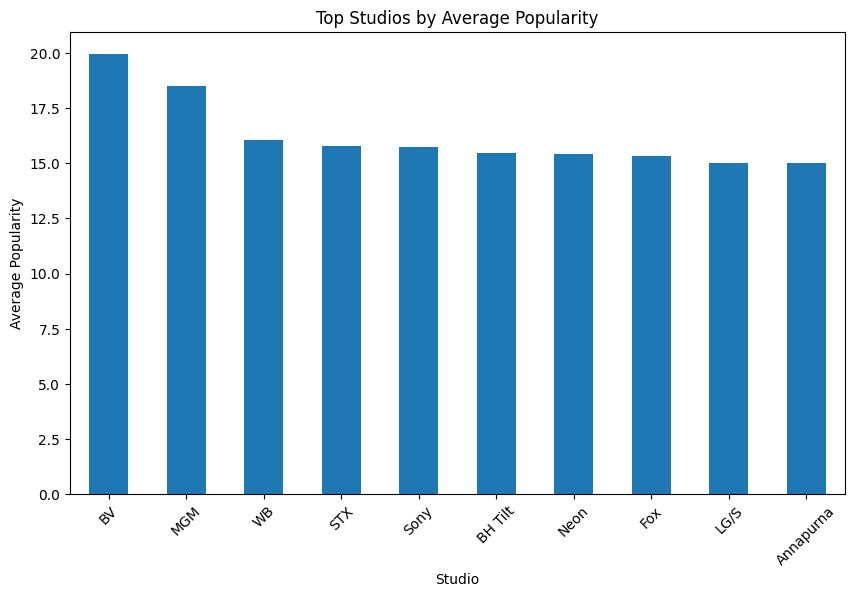

In [54]:
# Grouping studio and popularity, averaging them, sorting them out and taking the top 10 values
studio_pop = (merged.groupby('studio')['popularity'].mean().sort_values(ascending=False).head(10))   # keeping the top 10 for easy readability

# Plotting
plt.figure(figsize=(10,6))
studio_pop.plot(kind='bar')

plt.title('Top Studios by Average Popularity')
plt.xlabel('Studio')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

plt.show()

We see that **BV Studios**, **Metro-Goldwyn-Mayer**(*MGM*) and **Warner Bros**(*WB*) dominate the audiences' attention.

### Runtime against Popularity

This chart will help us know what movie length keeps audiences most engaged.

/tmp/ipython-input-1930646321.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_pop = merged.groupby('runtime_bin')['popularity'].mean()


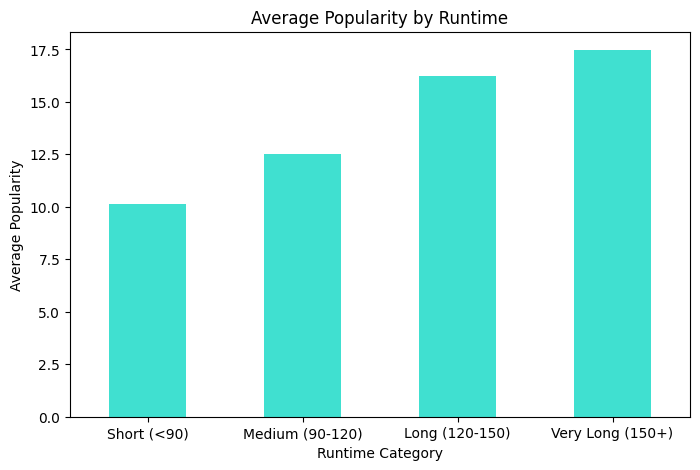

In [44]:
# Creating runtime bins and adding labels for easy interpretation
merged['runtime_bin'] = pd.cut(
    merged['runtime_minutes'],
    bins=[0, 90, 120, 150, 300],
    labels=['Short (<90)', 'Medium (90-120)', 'Long (120-150)', 'Very Long (150+)']
)

# Grouping the the columns and averaging them
runtime_pop = merged.groupby('runtime_bin')['popularity'].mean()

# Plotting
plt.figure(figsize=(8,5))
runtime_pop.plot(kind='bar', color='turquoise')

plt.title('Average Popularity by Runtime')
plt.xlabel('Runtime Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.show()

From the visual, we can conclude that movies with a runtime of 120 and higher are found more popular by the audience.

### Genre against Runtime

This visual will help us typically know how long different genres are which will help with production planning.

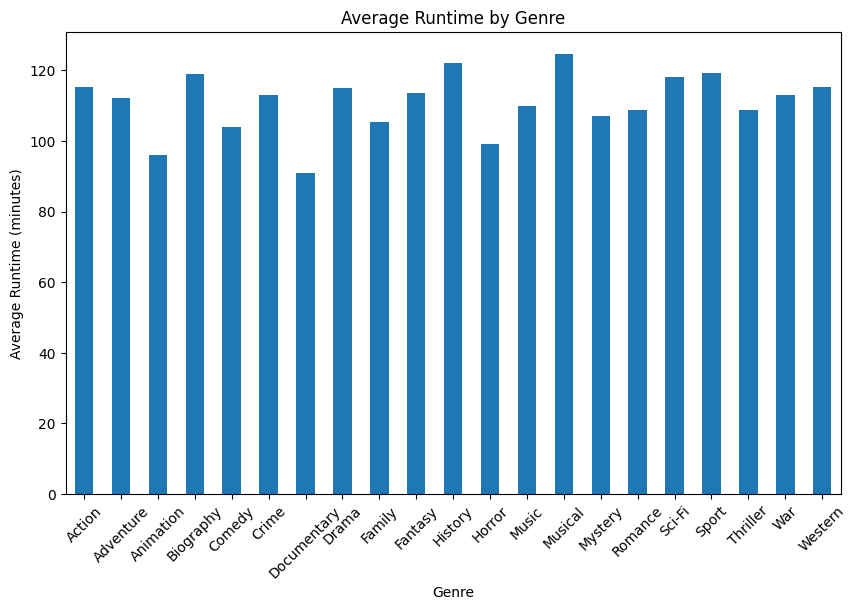

In [55]:
# Grouping genre and runtime and averaging them both. Taking the top 10
genre_runtime = genre_df.groupby('genres')['runtime_minutes'].mean()

# Plotting
plt.figure(figsize=(10,6))
genre_runtime.plot(kind='bar')

plt.title('Average Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)

plt.show()

From the chart, we see that *Action*, *Adventure* and *Sci-fi* all tend to run longer than 100 minutes.

# Recommendations

Based on historical movie performance data combining box office revenue, audience ratings, popularity, and production characteristics, several consistent patterns emerged. These insights inform the following strategic recommendations for the new movie studio.

## Recommendation 1 : Prioritize High Grossing Genres
Reference: *Genre vs Gross*,*Genre vs Popularity*

Action, Adventure and Sci-fi movies not only generate the highest revenues but also audiences have a high interest in them.

The studio should prioritize producing films in these genres, particularly for early releases, to maximize return on investment and attract large audiences.

This will help build a higher probability of strong box office performance and faster brand recognition.

## Recommendation 2 : Invest in quality to drive revenue
Reference : *Ratings vs Gross*, *Popularity vs Gross*

Movies with a higher audience ratings and greater popularity tend to earn significantly more revenue.

Allocate budget toward strong scripts, experienced directors, and higher production quality to improve audience satisfaction rather than focusing solely on quantity of releases.

This will help get better reviews which will lead to a higher popularity among audiences resulting in higher ticket sales.


## Recommendation 3 : Target Optimal Movie Runtime
Reference : *Runtime vs Gross*, *Runtime vs Popularity*

Movies with a runtime of over 120 minutes consistently show the highest revenue and audience engagement.

The studio should aim to keep most productions over the 120 minute range to balance storytelling, viewer attention, and production costs.

This will help guarantee a high revenue return and a high popularity among the audience.

## Recommendation 4 : Learning From Top Studios
Reference : *Studio vs Gross*, *Studio vs Popularity*

Only **BV Studios** has been present in the top three studios in term of Gross and Popularity.

The studio should study their genre focus, franchise development, marketing tactics and consider even partnerships or niche differentiation.

This will guarantee an improved competitive positioning and smarter market entry.

## Recommendation 5 : Use Popularity Driven Data To Guide Greenlighting
References : *Popularity vs Gross*, *Genre vs Popularity*

Audience interest indicators strongly predict box office success.

Incorporate pre-release popularity signals (social buzz, early screenings, trailers, online engagement) into decision-making when selecting projects.

Data-driven greenlighting reduces the chance of costly flops.

## Recommendation 6 : Allign Genre With Production Planning
Reference : *Genre vs Runtime*

Different genres have consistent runtime patterns and production demands.

Plan budgets and schedules according to genre expectations (e.g., longer runtimes for action,  adventure and Sci-fi).

This will help with a more accurate budgeting and fewer production overruns.